## Collaborative Filtering Approach
Collaborative filtering (CF) technique is very commonly used in recommendation systems. CF models work based on the assuption that similar users share the same interest and that similar items are liked by a user. Matrix Factorization(MF) is one class of CF used in recommender systems.

In [3]:
import pandas as pd
import numpy as np

#### Data Preprocess
Construct user-item matrix from ratings.csv

In [8]:
ratings = pd.read_csv('./data/ml-small/ratings.csv')
ratings.head()
ratings = ratings.drop(['timestamp'],axis=1)
# r_mat = pd.pivot_table(ratings,values='rating',index=['movieId'],columns=['userId'],fill_value=0)
# R = np.transpose(r_mat.values)
# R.shape

###  Singular Value Decomposition (SVD)
SVD is a latent-factor approach of MF methods. Feature space is reduced to capture user-item correlations. Below is a diagram of SVD algorithms.
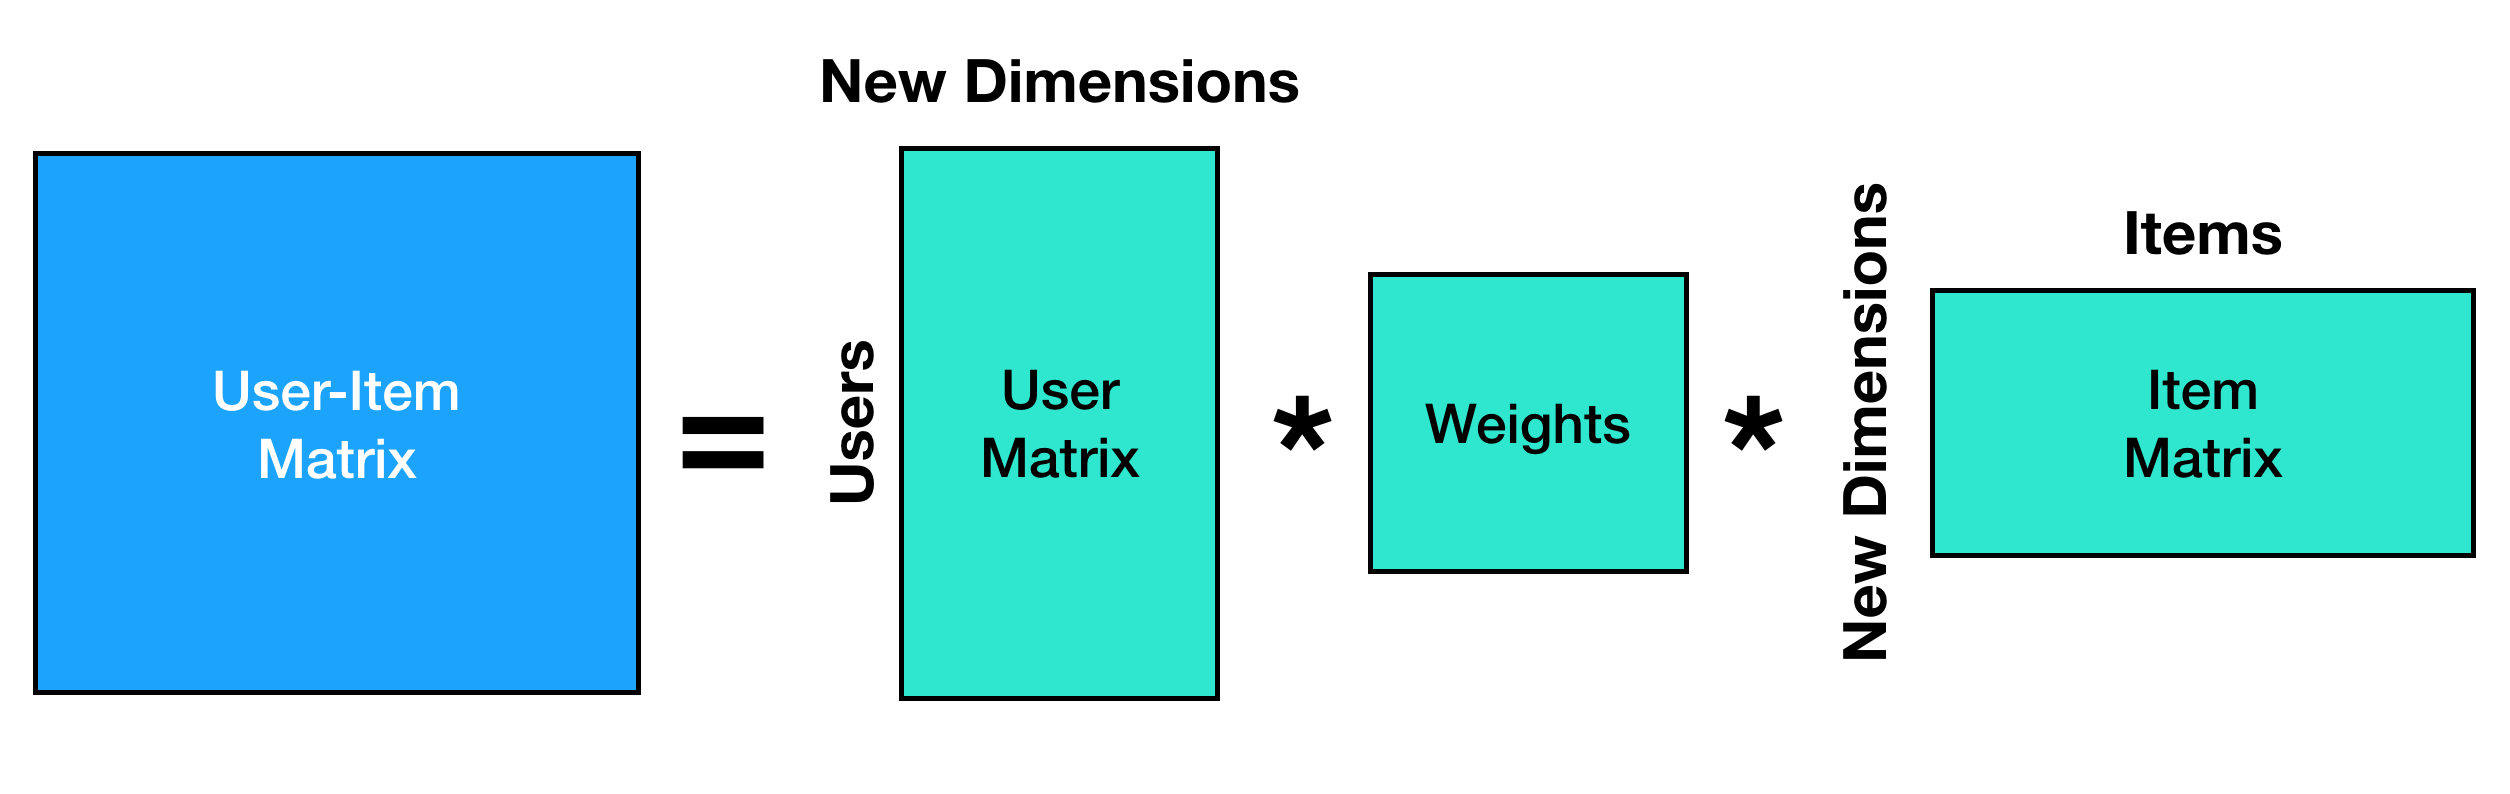

In [14]:
from surprise import Reader,Dataset
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import GridSearchCV

#Basic SVD implementation from Surprise : https://surprise.readthedocs.io/en/stable/index.html
reader = Reader(rating_scale=(1,5))
R = Dataset.load_from_df(ratings,reader)

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}
svd_gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=10, refit=True)

svd_gs.fit(R)

print(svd_gs.best_score['rmse'])
print(svd_gs.best_params['rmse'])

0.8884888116521656
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [45]:
# Surprise Implementation of Non-negative Matrix Factorization
import surprise
from surprise.model_selection import cross_validate

algo2 = surprise.NMF()
cross_validate(algo2,R,cv=10)

{'test_rmse': array([0.90335782, 0.90793115, 0.92540687, 0.91106611, 0.91105485,
        0.91139667, 0.91423155, 0.90460128, 0.91150793, 0.92276759]),
 'test_mae': array([0.69509491, 0.69444536, 0.7114219 , 0.69866845, 0.69884661,
        0.69324839, 0.69925571, 0.69213991, 0.69768433, 0.70674433]),
 'fit_time': (4.254696607589722,
  4.165010213851929,
  4.1646342277526855,
  4.137763500213623,
  4.376805305480957,
  4.942785024642944,
  4.509955406188965,
  4.33752703666687,
  4.420603036880493,
  4.480296850204468),
 'test_time': (0.03798842430114746,
  0.03692197799682617,
  0.03761005401611328,
  0.0408787727355957,
  0.05138969421386719,
  0.0369877815246582,
  0.0367739200592041,
  0.03636813163757324,
  0.0386347770690918,
  0.04852557182312012)}

### Get Top-N Recommendations

In [41]:
#Build testset
test = data.build_full_trainset().build_anti_testset()
#Get predictions
pred = svd_gs.test(test)

In [42]:
movies = pd.read_csv('processed_data/movies_new.csv')

def find_top_n(userId , n , pred):
    top_n=[]
    for uid,mid,_,est,_ in pred:
        if (uid==userId):
            top_n.append((mid,est))
    
    top_n.sort(key=lambda x:x[1], reverse=True)
    print ('Top N recommendations:')
    for i in range(n):
        mid = top_n[i][0]
        score = top_n[i][1]
        movie_title = movies[movies['movieId']==mid].title.values
        print ('Title: ', movie_title[0])
        
find_top_n(1,10,pred)

Top N recommendations:
Title:  Shawshank Redemption, The (1994)
Title:  Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Title:  Godfather, The (1972)
Title:  Lawrence of Arabia (1962)
Title:  Rear Window (1954)
Title:  Departed, The (2006)
Title:  Godfather: Part II, The (1974)
Title:  Streetcar Named Desire, A (1951)
Title:  Casablanca (1942)
Title:  Philadelphia Story, The (1940)
